Reproduce [Chaplin 2010](https://ui.adsabs.harvard.edu/#abs/2010ApJ...713L.169C/abstract) Figure 1

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import kplr
import numpy as np
import sys
sys.path.insert(0, '../')

In [2]:
from astropy.io import fits

data = fits.getdata('ftp://ftp.pmodwrc.ch/pub/data/irradiance/virgo/'
                    '1-minute_Data/VIRGO_1min_0083-7404.fits', cache=False)

array([-99., -99., -99., ..., -99., -99., -99.])

In [20]:
from interpacf import interpolate_missing_data
import numpy as np
time = np.arange(len(data))
#flux = data[data != 99]

times, fluxes = interpolate_missing_data(time[data != -99], data[data != -99])

fluxes /= np.median(fluxes)

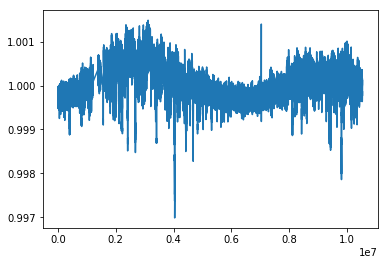

In [21]:
plt.plot(times, fluxes)

In [22]:
from scipy.signal import periodogram

freqs, powers = periodogram(fluxes, fs=1/60)
freqs *= 1e6

In [29]:
from scipy.stats import binned_statistic

cutoff_freq = 1e5
bs = binned_statistic(np.log(freqs[freqs != 0]), powers[freqs != 0], statistic=np.nanmedian, bins=10000)
bincenters = 0.5 * (bs.bin_edges[:-1] + bs.bin_edges[1:])
binned_power = bs.statistic[np.exp(bincenters) < cutoff_freq]
binned_freq = np.exp(bincenters)[np.exp(bincenters) < cutoff_freq]

/Users/bmmorris/anaconda/lib/python3.5/site-packages/scipy/stats/_binned_statistic.py:607: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = result[core]


(1e-08, 1e-05)

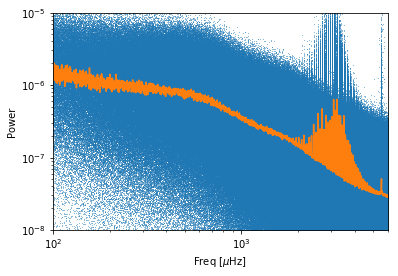

In [30]:
plt.loglog(freqs, powers, ',', alpha=0.5)
plt.loglog(binned_freq, binned_power)
plt.xlabel('Freq [$\mu$Hz]')
plt.ylabel('Power')
plt.xlim([1e2, 6e3])
plt.ylim([1e-8, 1e-5])

(1e-08, 1e-05)

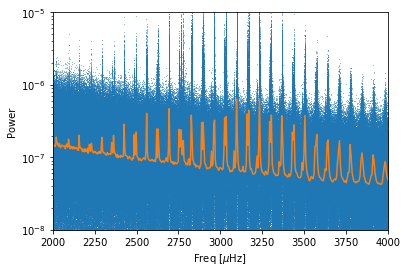

In [31]:
from scipy.ndimage import gaussian_filter1d

plt.semilogy(freqs, powers, ',', alpha=0.5)
# plt.semilogy(freqs[np.argsort(freqs)], gaussian_filter1d(powers[np.argsort(freqs)], 100))
plt.semilogy(binned_freq, binned_power)

plt.xlabel('Freq [$\mu$Hz]')
plt.ylabel('Power')
plt.xlim([2000, 4000])
plt.ylim([1e-8, 1e-5])

In [32]:
from shocksgo import generate_solar_fluxes

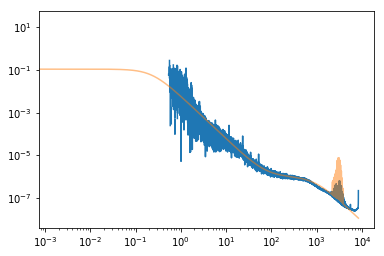

In [33]:
from astropy.constants import M_sun, L_sun
import astropy.units as u

fluxes, kernel = generate_solar_fluxes(size=1e5)

plt.loglog(binned_freq, binned_power)

plt.loglog(freqs, kernel.get_psd(2*np.pi*freqs*1e-6), alpha=0.5)

(1e-08, 0.0001)

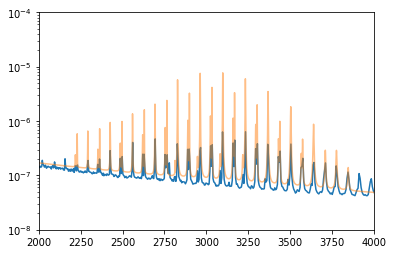

In [34]:
plt.semilogy(binned_freq, binned_power)

plt.semilogy(freqs, kernel.get_psd(2*np.pi*freqs*1e-6), alpha=0.5)
plt.xlim([2000, 4000])
plt.ylim([1e-8, 1e-4])